In [3]:
import mxnet as mx
    
from mxnet import gluon , nd , autograd

from mxnet.gluon import nn

import pandas as pd
import numpy as np
import datetime
import os

In [1]:
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA

from tkinter import filedialog
from tkinter import *

def browse_button():
    # Allow user to select a directory and store it in global var
    # called folder_path
    global folder_path
    filename = filedialog.askopenfile()
    folder_path.set(filename)
    print(filename)
    return filename


root = Tk()
folder_path = StringVar()
lbl1 = Label(master=root,textvariable=folder_path)
lbl1.grid(row=0, column=1)
button2 = Button(text="Browse", command=browse_button)
button2.grid(row=0, column=3)

x = browse_button()
mainloop()


<_io.TextIOWrapper name='D:/Python/Hackathon/Orderhealth/All_Base.xlsx' mode='r' encoding='cp1252'>


In [4]:
df = pd.read_excel(x.name)

In [5]:
df.tail(10)

,Date,A,B,C,D
1675,2019-08-03,16,45,71,89
1676,2019-08-04,48,6,47,61
1677,2019-08-05,56,77,26,11
1678,2019-08-06,41,99,41,13
1679,2019-08-07,22,38,88,88
1680,2019-08-08,43,41,71,63
1681,2019-08-09,47,95,15,84
1682,2019-08-10,35,62,63,0
1683,2019-08-11,34,31,55,93
1684,2019-08-12,90,37,43,46


In [6]:
df = df.dropna()

there is no data on the 1st of every month for field A&B

there is no data for field C&D on last day of every month

so we replaced those values with -1
if you want to change it according to you, please proceed

rest we need to find out the there may be dependencies of the fields on each other

rest every field is not dependent on holiday or something

In [7]:
def dayyear(x):
    
    
    #year = datetime.datetime.strptime(str(x) , "%Y-%m-%d").year
    #strval = datetime.datetime.strftime(x ,"%Y-%m-%d")
    
    year = datetime.datetime.strptime(x , "%d-%m-%Y").year
    month = datetime.datetime.strptime(x , "%d-%m-%Y").month
    day = datetime.datetime.strptime(x, "%d-%m-%Y").day

    
    return [year , month , day]

In [8]:
# test=  df["Date"].apply(dayyear)
# df2 = pd.DataFrame(test.tolist(), columns=['Year', 'Month' , "day"])
# df = pd.concat([df , df2] , axis=1)

In [9]:
df.head()

,Date,A,B,C,D
0,2015-01-01,93,-1,42,91
1,2015-01-02,28,27,1,39
2,2015-01-03,78,89,61,94
3,2015-01-04,24,7,30,1
4,2015-01-05,12,74,4,93


In [10]:
del df['Date']

In [11]:
df.Year = pd.Categorical(df.Year)

df.Month = pd.Categorical(df.Month)

df.day = pd.Categorical(df.day)

AttributeError: 'DataFrame' object has no attribute 'Year'

In [12]:
df.head()

,A,B,C,D
0,93,-1,42,91
1,28,27,1,39
2,78,89,61,94
3,24,7,30,1
4,12,74,4,93


In [13]:
df.isna().sum()

A    0
B    0
C    0
D    0
dtype: int64

In [14]:
df.isin([-1]).sum()

A     0
B    55
C    55
D    55
dtype: int64

In [15]:
df_2 = df.replace({-1:0})

In [16]:
df_2.isin([-1]).sum()

A    0
B    0
C    0
D    0
dtype: int64

In [17]:
df_2 = df_2.replace({0:np.nan})

In [18]:
df_2.isna().sum()

A    69
B    66
C    72
D    71
dtype: int64

In [19]:
df2 = df_2

In [20]:
df2.isin([-1]).sum()

A    0
B    0
C    0
D    0
dtype: int64

In [37]:
df2.isna().sum()

A    0
B    0
C    0
D    0
dtype: int64

In [22]:
df2.tail(15)

,A,B,C,D
1670,78.0,14.0,98.0,39.0
1671,97.0,50.0,54.0,67.0
1672,48.0,NaN,NaN,NaN
1673,NaN,37.0,81.0,22.0
1674,10.0,84.0,23.0,93.0
1675,16.0,45.0,71.0,89.0
1676,48.0,6.0,47.0,61.0
1677,56.0,77.0,26.0,11.0
1678,41.0,99.0,41.0,13.0
1679,22.0,38.0,88.0,88.0


In [23]:
df2 = df2.interpolate(method= 'linear' )

In [35]:
df2 = df2.interpolate(method= 'linear'  ,limit_direction='backward' )

In [36]:
df2.head(15)

,A,B,C,D
0,93.0,27.0,42.0,91.0
1,28.0,27.0,1.0,39.0
2,78.0,89.0,61.0,94.0
3,24.0,7.0,30.0,1.0
4,12.0,74.0,4.0,93.0
5,93.0,93.0,92.0,42.0
6,68.0,81.0,60.0,44.0
7,94.0,77.0,52.0,60.0
8,24.0,50.0,65.0,19.0
9,83.0,80.0,96.0,66.0


In [25]:
len(df2)

1685

In [175]:
df_train = df2
df_test =df2

In [176]:
df_train.shape

(1685, 4)

In [208]:
df_train = df2.iloc[0 : 1000 , :]



df_test = df2.iloc[1000 : len(df) , :]




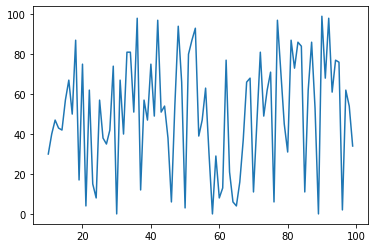

In [209]:
plt.plot(df.A[10:100])

In [210]:
# df_train = df.iloc[0 : 1000 , :]
# df_test = df.iloc[1000 : len(df) , :]


In [211]:
lot_size = 10
mins = 0
maxs = 4

In [212]:
# from sklearn.preprocessing import MinMaxScaler
# sc = MinMaxScaler(feature_range = (0, 1))
# training_set_scaled = sc.fit_transform(np.array(df_train).reshape(-1,1))


#training_set_scaled = np.array(training_set_scaled)
training_set_scaled = np.array(df_train)

print(training_set_scaled.shape)
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(lot_size, len(df_train)):
    #X_train.append(training_set_scaled[i-lot_size:i, 4:7])
    X_train.append(training_set_scaled[i-lot_size:i, mins:maxs])
    y_train.append(training_set_scaled[i, mins:maxs])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], (maxs- mins)))

(1000, 4)


In [213]:
1685*4

6740

In [214]:
# from sklearn.preprocessing import MinMaxScaler
# sc = MinMaxScaler(feature_range = (0, 1))
# training_set_scaled = sc.fit_transform(np.array(df_train).reshape(-1,4))

# print(training_set_scaled.shape)

# training_set_scaled = np.array(training_set_scaled)

# print(training_set_scaled.shape)
# #training_set_scaled = np.array(df_train)
# # Creating a data structure with 60 timesteps and 1 output
# X_train = []
# y_train = []
# for i in range(lot_size, len(df_train)):
#     #X_train.append(training_set_scaled[i-lot_size:i, 4:7])
#     X_train.append(training_set_scaled[i-lot_size:i, mins:maxs])
#     y_train.append(training_set_scaled[i, mins:maxs])
# X_train, y_train = np.array(X_train), np.array(y_train)

# # Reshaping
# X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], (maxs- mins)))

In [215]:
X_train.shape

(990, 10, 4)

In [216]:
X_train

array([[[93., 27., 42., 91.],
        [28., 27.,  1., 39.],
        [78., 89., 61., 94.],
        ...,
        [94., 77., 52., 60.],
        [24., 50., 65., 19.],
        [83., 80., 96., 66.]],

       [[28., 27.,  1., 39.],
        [78., 89., 61., 94.],
        [24.,  7., 30.,  1.],
        ...,
        [24., 50., 65., 19.],
        [83., 80., 96., 66.],
        [30., 67., 34., 30.]],

       [[78., 89., 61., 94.],
        [24.,  7., 30.,  1.],
        [12., 74.,  4., 93.],
        ...,
        [83., 80., 96., 66.],
        [30., 67., 34., 30.],
        [40., 50., 61., 88.]],

       ...,

       [[94., 25., 86.,  9.],
        [85.,  8., 50., 79.],
        [49.,  7., 67., 17.],
        ...,
        [62., 47., 44., 34.],
        [16., 95., 63.,  9.],
        [62., 41., 61., 63.]],

       [[85.,  8., 50., 79.],
        [49.,  7., 67., 17.],
        [86., 93., 25., 47.],
        ...,
        [16., 95., 63.,  9.],
        [62., 41., 61., 63.],
        [29., 10., 40., 31.]],

       [[49.

In [217]:
y_train

array([[30., 67., 34., 30.],
       [40., 50., 61., 88.],
       [47., 93., 69., 66.],
       ...,
       [29., 10., 40., 31.],
       [ 1., 59., 53., 29.],
       [13., 79., 90., 89.]])

In [218]:
y_train.shape

(990, 4)

In [219]:
y_train.shape

(990, 4)

In [220]:
# from sklearn.preprocessing import MinMaxScaler
# sc = MinMaxScaler(feature_range = (0, 1))
# training_set_scaled = sc.fit_transform(np.array(df_test).reshape(-1,4))

# training_set_scaled = np.array(training_set_scaled)
# #training_set_scaled = np.array(df_test)
# #training_set_scaled = np.array(df_test)
# # Creating a data structure with 60 timesteps and 1 output
# X_test = []
# y_test = []
# for i in range(lot_size, len(df_test)):
#     #X_train.append(training_set_scaled[i-lot_size:i, 4:7])
#     X_test.append(training_set_scaled[i-lot_size:i, mins:maxs])
#     y_test.append(training_set_scaled[i, mins:maxs])
# X_test, y_test = np.array(X_test), np.array(y_test)

# # Reshaping
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], (maxs- mins)))

In [221]:
# from sklearn.preprocessing import MinMaxScaler
# sc = MinMaxScaler(feature_range = (0, 1))
# training_set_scaled = sc.fit_transform(np.array(df_open).reshape(-1,1))


training_set_scaled = np.array(df_test)
#training_set_scaled = np.array(df_test)
# Creating a data structure with 60 timesteps and 1 output
X_test = []
y_test = []
for i in range(lot_size, len(df_test)):
    #X_train.append(training_set_scaled[i-lot_size:i, 4:7])
    X_test.append(training_set_scaled[i-lot_size:i, mins:maxs])
    y_test.append(training_set_scaled[i, mins:maxs])
X_test, y_test = np.array(X_test), np.array(y_test)

# Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], (maxs- mins)))

In [222]:
X_test.shape

(675, 10, 4)

In [223]:
y_test.shape

(675, 4)

In [226]:
y_train

array([[30., 67., 34., 30.],
       [40., 50., 61., 88.],
       [47., 93., 69., 66.],
       ...,
       [29., 10., 40., 31.],
       [ 1., 59., 53., 29.],
       [13., 79., 90., 89.]])

In [224]:
context = mx.cpu()

In [225]:
def build_net(net):
    
    with net.name_scope():
            
        net.add(mx.gluon.rnn.LSTM(5 , bidirectional = True ))
        net.add(mx.gluon.rnn.LSTM(3 , bidirectional = True ))

        net.add(mx.gluon.nn.Dense(328,activation='relu' ))
        net.add(mx.gluon.nn.Dense(164,activation='relu' ))
        net.add(mx.gluon.nn.Dense(64,activation='relu'))
        net.add(mx.gluon.nn.Dense(32,activation='relu'))
        net.add(mx.gluon.nn.Dense(4 ))
    
    
        return net
        
    
    
    

In [92]:
def build_net(net):
    
    with net.name_scope():
        
        #model.add(mx.gluon.rnn.LSTM(10 , num_layers =2 , input_size =1 ))
        #model.add(mx.gluon.rnn.LSTM(5 , bidirectional = True , num_layers =1  ))
        net.add(mx.gluon.rnn.LSTM(20 ,bidirectional = True, num_layers =1  ))
        #model.add(mx.gluon.nn.Dense(324,activation='relu' ))
        model.add(mx.gluon.nn.Dense(164,activation='relu' ))
        net.add(mx.gluon.nn.Dense(67,activation='relu'))
        net.add(mx.gluon.nn.Dense(32,activation='relu'))
        net.add(mx.gluon.nn.Dense(4 ))
    
    
        return net

In [227]:
def build_net(net):
    
    with net.name_scope():
            
        net.add(mx.gluon.rnn.LSTM(7 , bidirectional = True ))
        net.add(mx.gluon.rnn.LSTM(5 , bidirectional = True  ))
        net.add(mx.gluon.rnn.LSTM(3 , bidirectional = True ))
        net.add(mx.gluon.rnn.LSTM(1 , bidirectional = True ))
        net.add(mx.gluon.nn.BatchNorm())
        net.add(mx.gluon.nn.Dense(328,activation='relu' ))
        
        net.add(mx.gluon.nn.Dropout(.1))
        net.add(mx.gluon.nn.Dense(164,activation='relu' ))
      
        net.add(mx.gluon.nn.Dense(82,activation='relu'))
        
        net.add(mx.gluon.nn.Dense(41,activation='relu'))

        
        net.add(mx.gluon.nn.Dense(4 ))
    
    
        return net
    
    
    #net.add(mx.gluon.nn.BatchNorm(axis=1, center=True, scale=True))
        

In [228]:
model = build_net(gluon.nn.Sequential())

In [229]:
def evaluate_accuracy(data_iterator , model , L):
    
    loss_avg = 0.
    for i , (data,label) in enumerate(data_iterator):
        
        data = data.as_in_context(context).reshape((-1 ,lot_size , (maxs - mins)))
        label = label.as_in_context(context).reshape((-1, 1, (maxs - mins)))
        output = model(data)
        
        loss = L(output , label)
        loss_avg = (loss_avg*i+nd.mean(loss).asscalar())/(i+1)
        
    return loss_avg

In [230]:
def dataprep(X):
    
    
    
    
    training_set_scaled = X
    # Creating a data structure with 60 timesteps and 1 output
    X_train = []
    y_train = []
    for i in range(lot_size, len(X)):
        #X_train.append(training_set_scaled[i-lot_size:i, 4:7])
        X_train.append(training_set_scaled[i-lot_size:i, mins:maxs])
        y_train.append(training_set_scaled[i, mins:maxs])
    X_train, y_train = np.array(X_train), np.array(y_train)

    # Reshaping
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], (maxs- mins)))
    
    print("Y>>>>>>>>>>>>>>>>>>")
    #print(y_train)
    
    print("X>>>>>>>>>>>>>>>>>>")
    #print(X_train)
#     print(X_train.shape)
    
#     print(type(X_train))

    batch_size1 = len(X_train)
    
    training_data_batch = mx.gluon.data.DataLoader(gluon.data.ArrayDataset(nd.array(X_train) , nd.array(y_train)) ,
                                               batch_size=batch_size1 , shuffle= False)
    
    return training_data_batch

In [231]:
x = 10

y = 20

def addd():
    
    return x - y



In [232]:
model.collect_params().initialize(mx.init.Xavier() , ctx= context)
    
trainer = gluon.Trainer(model.collect_params(), 'Adam', {'learning_rate': 0.05})
    
L = gluon.loss.L2Loss()
    
batch_size1 = len(X_train)
batch_size_test = len(X_test)

training_data_batch = mx.gluon.data.DataLoader(gluon.data.ArrayDataset(nd.array(X_train) , nd.array(y_train)) ,
                                               batch_size=batch_size1 , shuffle= False)
validation_data_batches = mx.gluon.data.DataLoader(gluon.data.ArrayDataset(nd.array(X_test) , nd.array(y_test)) ,
                                                batch_size=batch_size_test , shuffle= False)


In [233]:
training_mse = []
validation_mse = []
output_res = []



def model_train(model , epochs ):
    

    
    count = 0    
    
    
    
    for epoch in range(epochs):
        
        print("Epoch" , epoch)
        
        for i, (data,label) in enumerate(training_data_batch):
            
            data = data.as_in_context(context).reshape((-1, lot_size, (maxs - mins)))
            
            
            
            label = label.as_in_context(context).reshape((-1, 1, (maxs - mins)))
            
            
            #print("lbabbeele" , data)
            
            
            with autograd.record():
                
                #print("ddataatata" , data)
                #print("here" , epoch)
                output = model(data)
                
             
                
                loss = L(output, label)
                
                #print(epoch)
                
                if epoch == (epochs-1):
                    
                    #print("here")
                    #print(output)
                    output_res.append(output.asnumpy())
                    #print("here2")
                    #print(output_res)
            
            loss.backward()
            
            
                
            trainer.step(batch_size1 , ignore_stale_grad= True)
                
        training_mse.append(evaluate_accuracy(training_data_batch, model, L))
                
                
        validation_mse.append(evaluate_accuracy(validation_data_batches, model, L))
        
        current_val = evaluate_accuracy(validation_data_batches, model, L)
        
        minimum = np.min(validation_mse)
        print("PRE values >> " , current_val , minimum)
        if (current_val > minimum) & (epoch > (epochs/2) ):
            
            count += 1
            print("Warning!!")
            print(current_val , minimum)
            if (count > 6) & (current_val < 0.0005):
                
                output_res.append(output.asnumpy())
                print(current_val , minimum)
                break
                
#         if(current_val < .7):
            
#             output_res.append(output.asnumpy())
#             print(current_val , minimum)
#             break  

In [234]:
model_train(model , 550  )

Epoch 0
PRE values >>  575.7109985351562 575.7109985351562
Epoch 1
PRE values >>  1687.5281982421875 575.7109985351562
Epoch 2
PRE values >>  1684.8265380859375 575.7109985351562
Epoch 3
PRE values >>  1483.698486328125 575.7109985351562
Epoch 4
PRE values >>  1016.0426025390625 575.7109985351562
Epoch 5
PRE values >>  1511.267822265625 575.7109985351562
Epoch 6
PRE values >>  1653.8775634765625 575.7109985351562
Epoch 7
PRE values >>  1683.169677734375 575.7109985351562
Epoch 8
PRE values >>  1639.86328125 575.7109985351562
Epoch 9
PRE values >>  1524.32080078125 575.7109985351562
Epoch 10
PRE values >>  1266.72021484375 575.7109985351562
Epoch 11
PRE values >>  960.393310546875 575.7109985351562
Epoch 12
PRE values >>  968.044189453125 575.7109985351562
Epoch 13
PRE values >>  1108.560546875 575.7109985351562
Epoch 14
PRE values >>  1227.1851806640625 575.7109985351562
Epoch 15
PRE values >>  1254.8074951171875 575.7109985351562
Epoch 16
PRE values >>  1137.5845947265625 575.71099853

PRE values >>  414.77130126953125 394.89129638671875
Epoch 137
PRE values >>  416.1643981933594 394.89129638671875
Epoch 138
PRE values >>  410.18426513671875 394.89129638671875
Epoch 139
PRE values >>  408.6485595703125 394.89129638671875
Epoch 140
PRE values >>  408.5732727050781 394.89129638671875
Epoch 141
PRE values >>  410.5494079589844 394.89129638671875
Epoch 142
PRE values >>  410.7038879394531 394.89129638671875
Epoch 143
PRE values >>  408.5566711425781 394.89129638671875
Epoch 144
PRE values >>  408.8842468261719 394.89129638671875
Epoch 145
PRE values >>  408.52532958984375 394.89129638671875
Epoch 146
PRE values >>  409.50823974609375 394.89129638671875
Epoch 147
PRE values >>  409.4911193847656 394.89129638671875
Epoch 148
PRE values >>  408.533203125 394.89129638671875
Epoch 149
PRE values >>  408.7389831542969 394.89129638671875
Epoch 150
PRE values >>  408.5282897949219 394.89129638671875
Epoch 151
PRE values >>  408.8894958496094 394.89129638671875
Epoch 152
PRE valu

PRE values >>  408.1927185058594 394.89129638671875
Epoch 269
PRE values >>  408.16412353515625 394.89129638671875
Epoch 270
PRE values >>  408.17138671875 394.89129638671875
Epoch 271
PRE values >>  408.25628662109375 394.89129638671875
Epoch 272
PRE values >>  408.29510498046875 394.89129638671875
Epoch 273
PRE values >>  408.19232177734375 394.89129638671875
Epoch 274
PRE values >>  408.1387939453125 394.89129638671875
Epoch 275
PRE values >>  408.1634216308594 394.89129638671875
Epoch 276
PRE values >>  408.2631530761719 394.89129638671875
Warning!!
408.2631530761719 394.89129638671875
Epoch 277
PRE values >>  408.2895812988281 394.89129638671875
Warning!!
408.2895812988281 394.89129638671875
Epoch 278
PRE values >>  408.1726989746094 394.89129638671875
Warning!!
408.1726989746094 394.89129638671875
Epoch 279
PRE values >>  408.1434326171875 394.89129638671875
Warning!!
408.1434326171875 394.89129638671875
Epoch 280
PRE values >>  408.1941223144531 394.89129638671875
Warning!!
408.

PRE values >>  408.0658264160156 394.89129638671875
Warning!!
408.0658264160156 394.89129638671875
Epoch 348
PRE values >>  408.1697082519531 394.89129638671875
Warning!!
408.1697082519531 394.89129638671875
Epoch 349
PRE values >>  408.40966796875 394.89129638671875
Warning!!
408.40966796875 394.89129638671875
Epoch 350
PRE values >>  408.1571350097656 394.89129638671875
Warning!!
408.1571350097656 394.89129638671875
Epoch 351
PRE values >>  408.03662109375 394.89129638671875
Warning!!
408.03662109375 394.89129638671875
Epoch 352
PRE values >>  408.0773010253906 394.89129638671875
Warning!!
408.0773010253906 394.89129638671875
Epoch 353
PRE values >>  408.2767028808594 394.89129638671875
Warning!!
408.2767028808594 394.89129638671875
Epoch 354
PRE values >>  408.3735046386719 394.89129638671875
Warning!!
408.3735046386719 394.89129638671875
Epoch 355
PRE values >>  408.178466796875 394.89129638671875
Warning!!
408.178466796875 394.89129638671875
Epoch 356
PRE values >>  408.1128845214

PRE values >>  406.40948486328125 394.89129638671875
Warning!!
406.40948486328125 394.89129638671875
Epoch 424
PRE values >>  405.4913330078125 394.89129638671875
Warning!!
405.4913330078125 394.89129638671875
Epoch 425
PRE values >>  405.9793395996094 394.89129638671875
Warning!!
405.9793395996094 394.89129638671875
Epoch 426
PRE values >>  406.216796875 394.89129638671875
Warning!!
406.216796875 394.89129638671875
Epoch 427
PRE values >>  406.729248046875 394.89129638671875
Warning!!
406.729248046875 394.89129638671875
Epoch 428
PRE values >>  407.80615234375 394.89129638671875
Warning!!
407.80615234375 394.89129638671875
Epoch 429
PRE values >>  406.8302001953125 394.89129638671875
Warning!!
406.8302001953125 394.89129638671875
Epoch 430
PRE values >>  406.97772216796875 394.89129638671875
Warning!!
406.97772216796875 394.89129638671875
Epoch 431
PRE values >>  407.46478271484375 394.89129638671875
Warning!!
407.46478271484375 394.89129638671875
Epoch 432
PRE values >>  407.35144042

PRE values >>  424.5238037109375 394.89129638671875
Warning!!
424.5238037109375 394.89129638671875
Epoch 500
PRE values >>  399.92498779296875 394.89129638671875
Warning!!
399.92498779296875 394.89129638671875
Epoch 501
PRE values >>  394.74517822265625 394.74517822265625
Epoch 502
PRE values >>  392.3626403808594 392.3626403808594
Epoch 503
PRE values >>  389.891845703125 389.891845703125
Epoch 504
PRE values >>  399.03704833984375 389.891845703125
Warning!!
399.03704833984375 389.891845703125
Epoch 505
PRE values >>  402.0052185058594 389.891845703125
Warning!!
402.0052185058594 389.891845703125
Epoch 506
PRE values >>  387.5618896484375 387.5618896484375
Epoch 507
PRE values >>  387.9677429199219 387.5618896484375
Warning!!
387.9677429199219 387.5618896484375
Epoch 508
PRE values >>  409.51171875 387.5618896484375
Warning!!
409.51171875 387.5618896484375
Epoch 509
PRE values >>  384.0746154785156 384.0746154785156
Epoch 510
PRE values >>  382.4519348144531 382.4519348144531
Epoch 51

In [235]:
model

Sequential(
  (0): LSTM(4 -> 7, TNC, bidirectional)
  (1): LSTM(14 -> 5, TNC, bidirectional)
  (2): LSTM(10 -> 3, TNC, bidirectional)
  (3): LSTM(6 -> 1, TNC, bidirectional)
  (4): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=10)
  (5): Dense(20 -> 328, Activation(relu))
  (6): Dropout(p = 0.1, axes=())
  (7): Dense(328 -> 164, Activation(relu))
  (8): Dense(164 -> 82, Activation(relu))
  (9): Dense(82 -> 41, Activation(relu))
  (10): Dense(41 -> 4, linear)
)

In [236]:
np.array(output_res).reshape(-1,)

array([31.239809, 31.199797, 32.742973, ..., 61.44664 , 64.6317  ,
       60.993267], dtype=float32)

In [237]:
output_res

[array([[31.239809, 31.199797, 32.742973, 30.83458 ],
        [51.99466 , 51.875114, 54.540604, 51.449642],
        [55.957817, 55.823086, 58.702885, 55.386105],
        ...,
        [28.417925, 28.388725, 29.77931 , 28.031702],
        [34.550682, 34.49798 , 36.220192, 34.123146],
        [61.603   , 61.44664 , 64.6317  , 60.993267]], dtype=float32)]

In [142]:
y_train

array([[28. , 27. ,  1. , 39. ],
       [78. , 89. , 61. , 94. ],
       [24. ,  7. , 30. ,  1. ],
       ...,
       [35. , 62. , 63. , 88.5],
       [34. , 31. , 55. , 93. ],
       [90. , 37. , 43. , 46. ]])

In [ ]:
validation_mse

In [ ]:
type(output_res)

In [ ]:
%matplotlib inline
plt.figure(figsize = (70 ,30))
plt.plot(y_train[:, 0:1], color = 'red', label = 'Feature A - Actual')
plt.plot(np.array(output_res).reshape(-1,), color = 'blue', label = 'Predicted ')
plt.title('Number - A')
plt.xlabel('Time')
plt.ylabel('Number - A')
plt.legend()
plt.show()

In [238]:
output_test = model(nd.array(X_test))

In [239]:
output_test = output_test.asnumpy()

In [240]:
output_test

array([[49.29964 , 49.47465 , 51.50894 , 48.94459 ],
       [66.27434 , 66.484314, 69.26794 , 65.86468 ],
       [69.18214 , 69.398094, 72.310074, 68.763115],
       ...,
       [53.7685  , 53.952717, 56.184277, 53.399075],
       [35.989666, 36.13726 , 37.583996, 35.67744 ],
       [75.90907 , 76.13889 , 79.34782 , 75.468414]], dtype=float32)

In [241]:
y_test

array([[97. , 92. , 76. , 53. ],
       [97. , 43. , 58. , 95. ],
       [25. , 67. , 95. , 31. ],
       ...,
       [35. , 62. , 63. , 88.5],
       [34. , 31. , 55. , 93. ],
       [90. , 37. , 43. , 46. ]])

In [ ]:
%matplotlib inline
plt.figure(figsize = (20 ,10))
plt.plot(y_test[:, 0:1], color = 'red', label = 'Feature A - Actual')
plt.plot(output_test[:, 0:1], color = 'blue', label = 'Predicted ')
plt.title('Number - A')
plt.xlabel('Time')
plt.ylabel('Number - A')
plt.legend()
plt.show()

In [ ]:
X_test_for =X_test

In [ ]:
test1 = model(nd.array(X_test_for[start:len(X_test_for) , :]))

In [ ]:
test =model(nd.array(y_test).reshape(-1,1,1))

In [ ]:
test = np.around(test.asnumpy())

In [ ]:
test

In [ ]:
model(nd.array(test3).reshape(-1,1,1))

In [152]:
y_test.shape

(1684, 4)

In [ ]:
model(nd.array(y_test).reshape(-1,1,1))

In [242]:
test = y_test

limit = 6

for i in range(1 , limit):
    
    
    test = model(nd.array(test).reshape(-1, lot_size, (maxs - mins)))
    
    test = np.around(test.asnumpy())
    
    new = test[-1]
    
    print(new)

[76. 77. 80. 76.]
[75. 75. 79. 75.]


MXNetError: [23:42:26] c:\jenkins\workspace\mxnet-tag\mxnet\src\imperative\./imperative_utils.h:124: Check failed: infershape[attrs.op](attrs, &in_shapes, &out_shapes) 

In [ ]:
test = df_train.Output

limit = 6

for i in range(1 , limit):
    
    
    test = model(nd.array(test).reshape(-1,1,1))
    
    test = np.around(test.asnumpy())
    
    new = test[-1]
    
    print(new)

In [ ]:
y_test.shape

In [ ]:
y_test

In [ ]:
y_test_for

In [ ]:
y_test_for.shape

In [155]:
y_test_for = y_test.reshape(-1,1,1)

In [156]:
start = 1000

In [157]:
start

1000

In [158]:
y_test_for[start:len(y_test_for) , :]

array([[[64.]],

       [[12.]],

       [[43.]],

       ...,

       [[37.]],

       [[43.]],

       [[46.]]])

In [159]:
len(y_test_for[start:len(y_test_for) , :])

5736

# Iterative incremental Learning (Transfer) for predicting forward Price (Future Price)

In [161]:



limit = 3
k = []

for i in range(1 , limit):
    
    
    

    if i == 1:
        
            

    
        print('1----------------------------')
    
        #output1 =  model( nd.array(X_test_for[start:len(X_test_for) , :]))
        
        output1 =  model( nd.array(y_test_for).reshape(-1, lot_size, (maxs - mins)))
        
        #print(output1)
    
        file_name = "net.params"
        model.save_parameters(file_name)
        
        new = output1[-1].reshape((-1, 1, (maxs-mins)))
        
        new = new.asnumpy()
    
        y_test_for = np.append(y_test_for , new).reshape(-1 , 1 ,(maxs-mins))
    
        #print(X_test_for)
    
        y_test_for = np.delete(y_test_for , 0 ,0)   
    
        k.append(new)
        
    print('other model' , i)
    
    
    
    
    #output1 = output1.asnumpy()
    
    

    print('2------------------------')
    
    #print(X_test_for)
    
    print('3------------------------')
    
        
    #print("data beffore correction")
    #print(y_test_for[start:len(y_test_for) , :])

    

    
    training_data_batch = dataprep(y_test_for[start:len(y_test_for) , :])
    


    model22 = build_net(gluon.nn.Sequential())
    model22.load_parameters(file_name, ctx=context)
    
    trainer = gluon.Trainer(model22.collect_params(), 'adam', {'learning_rate': 0.05})
    #0.05
    
    model_train(model22 , 250)
    
    output1 = model22(nd.array(y_test_for[start:len(y_test_for) , :]))
    
    #print("output1" , output1)
    
    file_name = "net.params"
    model22.save_parameters(file_name)
        

    new = output1[-1].reshape((-1, 1, (maxs-mins)))
    
    new = new.asnumpy()
    
    y_test_for = np.append(y_test_for , new).reshape(-1 , 1 ,(maxs-mins))
    
    
    
    y_test_for = np.delete(y_test_for , 0 ,0)   
    
    
    #print("data after correction")
    #print(y_test_for[start:len(y_test_for) , :])

       
    k.append(new)
    
    

1----------------------------
other model 1
2------------------------
3------------------------
Y>>>>>>>>>>>>>>>>>>
X>>>>>>>>>>>>>>>>>>
Epoch 0
PRE values >>  6691.87060546875 317.65386962890625
Epoch 1
PRE values >>  546.5062866210938 317.65386962890625
Epoch 2
PRE values >>  888.1669921875 317.65386962890625
Epoch 3
PRE values >>  1100.65771484375 317.65386962890625
Epoch 4
PRE values >>  1146.71630859375 317.65386962890625
Epoch 5
PRE values >>  1114.8642578125 317.65386962890625
Epoch 6
PRE values >>  1011.1901245117188 317.65386962890625
Epoch 7
PRE values >>  827.3087158203125 317.65386962890625
Epoch 8
PRE values >>  580.7965698242188 317.65386962890625
Epoch 9
PRE values >>  416.67974853515625 317.65386962890625
Epoch 10
PRE values >>  645.7203369140625 317.65386962890625
Epoch 11
PRE values >>  554.291259765625 317.65386962890625
Epoch 12
PRE values >>  415.06817626953125 317.65386962890625
Epoch 13
PRE values >>  465.3765869140625 317.65386962890625
Epoch 14
PRE values >>  49

PRE values >>  406.1322021484375 317.65386962890625
Warning!!
406.1322021484375 317.65386962890625
Epoch 130
PRE values >>  406.1295166015625 317.65386962890625
Warning!!
406.1295166015625 317.65386962890625
Epoch 131
PRE values >>  406.126220703125 317.65386962890625
Warning!!
406.126220703125 317.65386962890625
Epoch 132
PRE values >>  406.124267578125 317.65386962890625
Warning!!
406.124267578125 317.65386962890625
Epoch 133
PRE values >>  406.12432861328125 317.65386962890625
Warning!!
406.12432861328125 317.65386962890625
Epoch 134
PRE values >>  406.12615966796875 317.65386962890625
Warning!!
406.12615966796875 317.65386962890625
Epoch 135
PRE values >>  406.1285400390625 317.65386962890625
Warning!!
406.1285400390625 317.65386962890625
Epoch 136
PRE values >>  406.1297607421875 317.65386962890625
Warning!!
406.1297607421875 317.65386962890625
Epoch 137
PRE values >>  406.1288146972656 317.65386962890625
Warning!!
406.1288146972656 317.65386962890625
Epoch 138
PRE values >>  406.

PRE values >>  406.1250305175781 317.65386962890625
Warning!!
406.1250305175781 317.65386962890625
Epoch 206
PRE values >>  406.12506103515625 317.65386962890625
Warning!!
406.12506103515625 317.65386962890625
Epoch 207
PRE values >>  406.12506103515625 317.65386962890625
Warning!!
406.12506103515625 317.65386962890625
Epoch 208
PRE values >>  406.1250305175781 317.65386962890625
Warning!!
406.1250305175781 317.65386962890625
Epoch 209
PRE values >>  406.1249694824219 317.65386962890625
Warning!!
406.1249694824219 317.65386962890625
Epoch 210
PRE values >>  406.1248779296875 317.65386962890625
Warning!!
406.1248779296875 317.65386962890625
Epoch 211
PRE values >>  406.1248474121094 317.65386962890625
Warning!!
406.1248474121094 317.65386962890625
Epoch 212
PRE values >>  406.1248474121094 317.65386962890625
Warning!!
406.1248474121094 317.65386962890625
Epoch 213
PRE values >>  406.1248779296875 317.65386962890625
Warning!!
406.1248779296875 317.65386962890625
Epoch 214
PRE values >>  

PRE values >>  407.2005920410156 317.65386962890625
Epoch 55
PRE values >>  407.8948059082031 317.65386962890625
Epoch 56
PRE values >>  408.3436279296875 317.65386962890625
Epoch 57
PRE values >>  408.2360534667969 317.65386962890625
Epoch 58
PRE values >>  407.6248779296875 317.65386962890625
Epoch 59
PRE values >>  406.84185791015625 317.65386962890625
Epoch 60
PRE values >>  406.25628662109375 317.65386962890625
Epoch 61
PRE values >>  406.0604553222656 317.65386962890625
Epoch 62
PRE values >>  406.2055358886719 317.65386962890625
Epoch 63
PRE values >>  406.4838562011719 317.65386962890625
Epoch 64
PRE values >>  406.6739807128906 317.65386962890625
Epoch 65
PRE values >>  406.657958984375 317.65386962890625
Epoch 66
PRE values >>  406.4617004394531 317.65386962890625
Epoch 67
PRE values >>  406.21630859375 317.65386962890625
Epoch 68
PRE values >>  406.0704040527344 317.65386962890625
Epoch 69
PRE values >>  406.1031799316406 317.65386962890625
Epoch 70
PRE values >>  406.283935

PRE values >>  406.14752197265625 317.65386962890625
Warning!!
406.14752197265625 317.65386962890625
Epoch 162
PRE values >>  406.1475524902344 317.65386962890625
Warning!!
406.1475524902344 317.65386962890625
Epoch 163
PRE values >>  406.1478271484375 317.65386962890625
Warning!!
406.1478271484375 317.65386962890625
Epoch 164
PRE values >>  406.148193359375 317.65386962890625
Warning!!
406.148193359375 317.65386962890625
Epoch 165
PRE values >>  406.1485595703125 317.65386962890625
Warning!!
406.1485595703125 317.65386962890625
Epoch 166
PRE values >>  406.1488342285156 317.65386962890625
Warning!!
406.1488342285156 317.65386962890625
Epoch 167
PRE values >>  406.14886474609375 317.65386962890625
Warning!!
406.14886474609375 317.65386962890625
Epoch 168
PRE values >>  406.14874267578125 317.65386962890625
Warning!!
406.14874267578125 317.65386962890625
Epoch 169
PRE values >>  406.1485900878906 317.65386962890625
Warning!!
406.1485900878906 317.65386962890625
Epoch 170
PRE values >>  

PRE values >>  406.14898681640625 317.65386962890625
Warning!!
406.14898681640625 317.65386962890625
Epoch 237
PRE values >>  406.14898681640625 317.65386962890625
Warning!!
406.14898681640625 317.65386962890625
Epoch 238
PRE values >>  406.14892578125 317.65386962890625
Warning!!
406.14892578125 317.65386962890625
Epoch 239
PRE values >>  406.14892578125 317.65386962890625
Warning!!
406.14892578125 317.65386962890625
Epoch 240
PRE values >>  406.14892578125 317.65386962890625
Warning!!
406.14892578125 317.65386962890625
Epoch 241
PRE values >>  406.1488952636719 317.65386962890625
Warning!!
406.1488952636719 317.65386962890625
Epoch 242
PRE values >>  406.1488952636719 317.65386962890625
Warning!!
406.1488952636719 317.65386962890625
Epoch 243
PRE values >>  406.1488952636719 317.65386962890625
Warning!!
406.1488952636719 317.65386962890625
Epoch 244
PRE values >>  406.1488952636719 317.65386962890625
Warning!!
406.1488952636719 317.65386962890625
Epoch 245
PRE values >>  406.14889526

In [162]:
k

[array([[[56.39411 , 56.919865, 56.709354, 56.32541 ]]], dtype=float32),
 array([[[51.211124, 51.51265 , 50.65    , 51.73184 ]]], dtype=float32),
 array([[[50.660217, 50.8932  , 50.063705, 51.128338]]], dtype=float32)]

In [ ]:
k

In [ ]:
k

In [ ]:
k

In [ ]:
-
-
-
X
63
32
73
0
76
16
56
83
15
96


In [ ]:
[array([[[3.5939794]]], dtype=float32),
 array([[[61.26958]]], dtype=float32),
 array([[[48.243618]]], dtype=float32),
 array([[[13.0139675]]], dtype=float32),
 array([[[69.53148]]], dtype=float32),
 array([[[26.545092]]], dtype=float32)]

In [ ]:


# limit = 7
# k = []

# for i in range(1 , limit):
    
    
    

#     if i == 1:
        
            

    
#         print('1----------------------------')
    
#         #output1 =  model( nd.array(X_test_for[start:len(X_test_for) , :]))
        
#         output1 =  model( nd.array(X_test_for))
        
#         #print(output1)
    
#         file_name = "net.params"
#         model.save_parameters(file_name)
        
#         new = output1[-1].reshape((-1, 1, (maxs-mins)))
        
#         new = new.asnumpy()
    
#         X_test_for = np.append(X_test_for , new).reshape(-1 , 1 ,(maxs-mins))
    
#         #print(X_test_for)
    
#         X_test_for = np.delete(X_test_for , 0 ,0)   
    
        
        
#     print('other model' , i)
    
    
    
    
#     #output1 = output1.asnumpy()
    
    

#     print('2------------------------')
    
#     #print(X_test_for)
    
#     print('3------------------------')
    
        
#     print("data beffore correction")
#     print(X_test_for[start:len(X_test_for) , :])

    
#     #print(X_test_for[start:len(X_test_for) , :])
    
#     training_data_batch = dataprep(X_test_for[start:len(X_test_for) , :])
    
#     #training_data_batch = dataprep(X_test_for)
    
#     print(type(X_test_for))
    
#     #training_data_batch = dataprep(X_test_for)
    
#     #print(X_test_for)
#     #print(training_data_batch)

#     model22 = build_net(gluon.nn.Sequential())
#     model22.load_parameters(file_name, ctx=context)
    
#     trainer = gluon.Trainer(model22.collect_params(), 'adam', {'learning_rate': 0.05})
    
    
#     model_train(model22 , 10)
    
#     output1 = model22(nd.array(X_test_for[start:len(X_test_for) , :]))
    
#     print("output1" , output1)
    
#     file_name = "net.params"
#     model22.save_parameters(file_name)
        

#     new = output1[-1].reshape((-1, 1, (maxs-mins)))
    
#     new = new.asnumpy()
    
#     X_test_for = np.append(X_test_for , new).reshape(-1 , 1 ,(maxs-mins))
    
#     #print(X_test_for)
    
#     X_test_for = np.delete(X_test_for , 0 ,0)   
    
    
#     print("data after correction")
#     print(X_test_for[start:len(X_test_for) , :])

       
#     k.append(new)

In [ ]:
k

In [ ]:
np.array(k).reshape(-1  , (maxs-mins))[: , 0:1]

In [ ]:
%matplotlib inline
plt.figure(figsize = (30 ,20))
plt.plot(y_test[:, 0:1], color = 'red', label = 'Feature A - Actual')
plt.plot(np.array(k).reshape(-1  , (maxs-mins))[: , 0:1], color = 'blue', label = 'Predicted ')
plt.title('Number - A')
plt.xlabel('Time')
plt.ylabel('Number - A')
plt.legend()
plt.show()

In [ ]:

num_hidden = 256
num_outputs = 1
net = gluon.nn.Sequential()
with net.name_scope():
    net.add(gluon.nn.Dense(num_hidden, activation="relu"))
    net.add(gluon.nn.Dense(num_hidden, activation="relu"))
    net.add(gluon.nn.Dense(num_outputs))

In [ ]:
net.collect_params().initialize(mx.init.Normal(sigma=1.), ctx=context)

In [ ]:
net(nd.ones((1, 100), ctx=context))

In [ ]:
nd.ones((1, 100))

In [ ]:
filename = "testnet.params"
net.save_parameters(filename)
net2 = gluon.nn.Sequential()
with net2.name_scope():
    net2.add(gluon.nn.Dense(num_hidden, activation="relu"))
    net2.add(gluon.nn.Dense(num_hidden, activation="relu"))
    
    net2.add(gluon.nn.Dense(num_outputs))

In [ ]:
net2.load_parameters(filename, ctx=context)
net2(nd.ones((1, 100), ctx=context))

In [ ]:
context

In [ ]:
constants